In [9]:
# Import essetial modules
import csv
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Import data from csv file into a pandas dataframe and check that if it is correct
df = pd.read_csv("poloniex_usdt_btc_20170101_DOHLCV_300.csv", sep=';')
print(df.head())

         date        open        high         low       close       volume
0  1483228800  965.000001  965.000001  964.000000  964.000001  5398.837117
1  1483229100  966.150000  966.150000  964.000002  964.000002    84.302118
2  1483229400  964.050000  966.149988  962.028165  964.000000  2638.676171
3  1483229700  962.028165  964.000000  961.700000  962.200001  3415.272309
4  1483230000  964.000011  964.677377  962.769304  962.849999    80.287691


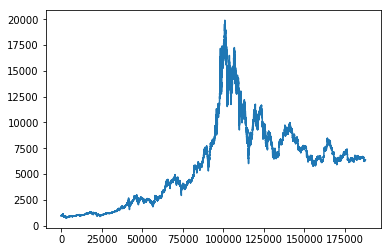

In [10]:
# Plot 'open' values
plt.plot(range(df.values.shape[0]), df.values[:, 1])
plt.show()

In [13]:
# Turn dataframe into a numpy floating point array
df_values = df.values
timestamps = df_values[:, 0]
dataset = df_values[:, 1:].astype("float")


# Split the dataset into training (70%), cross validation (20%) and test (10%) set
samples_num = dataset.shape[0]

valid_split = 0.2
test_split = 0.1

dataset_train = dataset[0:int(samples_num * (1 - valid_split - test_split))]
dataset_valid = dataset[int(samples_num * (1 - valid_split - test_split)):int(samples_num * (1 - test_split))]
dataset_test = dataset[int(samples_num * (1 - test_split)):]

# Helper function for creating dataset for LSTM components
# [Description:   We want to predict the next value in time, so we have to
#                 shift the values with the 'look_back' variable]
def create_dataset_for_lstm(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back, :])
    return np.array(dataX), np.array(dataY)

# Call the helper function for the training, cross validation and test sets,
# then format them consistently
look_back = 1
X_train, Y_train = create_dataset_for_lstm(dataset_train, look_back)
X_valid, Y_valid = create_dataset_for_lstm(dataset_valid, look_back)
X_test, Y_test = create_dataset_for_lstm(dataset_test, look_back)

X_train = X_train[:, 0, :]
X_valid = X_valid[:, 0, :]
X_test = X_test[:, 0, :]

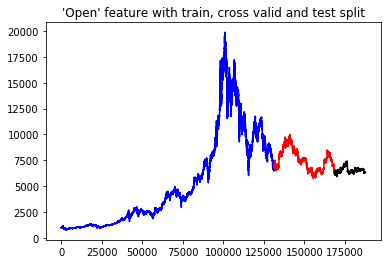

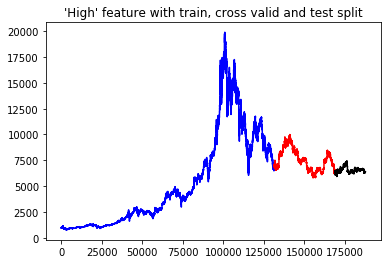

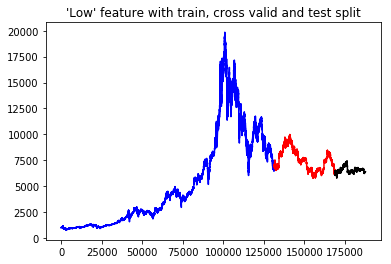

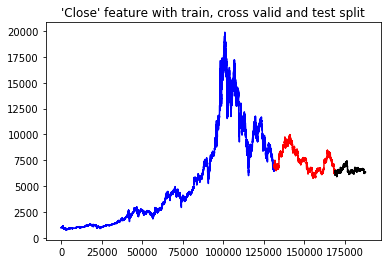

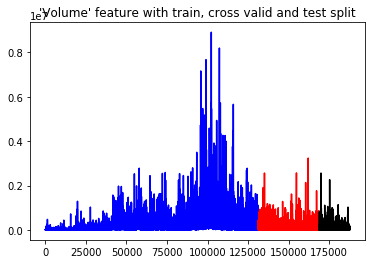

In [14]:
# Plot 'open' feature
plt.plot(dataset_train[:, 0], '-b')
plt.plot([None for i in dataset_train[:, 0]] + [x for x in dataset_valid[:, 0]], '-r')
plt.plot([None for i in dataset_train[:, 0]] + [None for x in dataset_valid[:, 0]] + [x for x in dataset_test[:, 0]], '-k')
plt.title("'Open' feature with train, cross valid and test split")
plt.show()

# Plot 'high' feature
plt.plot(dataset_train[:, 1], '-b')
plt.plot([None for i in dataset_train[:, 1]] + [x for x in dataset_valid[:, 1]], '-r')
plt.plot([None for i in dataset_train[:, 1]] + [None for x in dataset_valid[:, 1]] + [x for x in dataset_test[:, 1]], '-k')
plt.title("'High' feature with train, cross valid and test split")
plt.show()

# Plot 'low' feature
plt.plot(dataset_train[:, 2], '-b')
plt.plot([None for i in dataset_train[:, 2]] + [x for x in dataset_valid[:, 2]], '-r')
plt.plot([None for i in dataset_train[:, 2]] + [None for x in dataset_valid[:, 2]] + [x for x in dataset_test[:, 2]], '-k')
plt.title("'Low' feature with train, cross valid and test split")
plt.show()

# Plot 'close' feature
plt.plot(dataset_train[:, 3], '-b')
plt.plot([None for i in dataset_train[:, 3]] + [x for x in dataset_valid[:, 3]], '-r')
plt.plot([None for i in dataset_train[:, 3]] + [None for x in dataset_valid[:, 3]] + [x for x in dataset_test[:, 3]], '-k')
plt.title("'Close' feature with train, cross valid and test split")
plt.show()

# Plot 'volume' feature
plt.plot(dataset_train[:, 4], '-b')
plt.plot([None for i in dataset_train[:, 4]] + [x for x in dataset_valid[:, 4]], '-r')
plt.plot([None for i in dataset_train[:, 4]] + [None for x in dataset_valid[:, 4]] + [x for x in dataset_test[:, 4]], '-k')
plt.title("'Volume' feature with train, cross valid and test split")
plt.show()

In [17]:
# Normalize data
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

print ("X_train:\n" + str(X_train))
print ("\nX_valid:\n" + str(X_valid))
print ("\nX_test:\n" + str(X_test))

X_train:
[[-0.9537842  -0.95373057 -0.95412946 -0.95404032 -0.54711056]
 [-0.95352697 -0.9534742  -0.95412946 -0.95404032 -0.56755828]
 [-0.9539967  -0.9534742  -0.95457215 -0.95404032 -0.5577303 ]
 ...
 [ 0.3580833   0.35374974  0.35342852  0.35141931 -0.52552558]
 [ 0.35131252  0.3532916   0.35601746  0.35664076 -0.49752699]
 [ 0.3535956   0.3531123   0.35214551  0.34845719 -0.428721  ]]

X_valid:
[[ 0.3437949   0.34393687  0.34847204  0.34581998 -0.4925072 ]
 [ 0.34490003  0.34481395  0.34958125  0.3480933  -0.51431138]
 [ 0.34893957  0.34481395  0.35161946  0.34790328 -0.51865034]
 ...
 [ 0.27239945  0.26835243  0.27587457  0.27155162 -0.49768672]
 [ 0.27146488  0.26742099  0.27464153  0.270323   -0.56372049]
 [ 0.27022032  0.26660639  0.27342916  0.2707342  -0.53141038]]

X_test:
[[ 0.2772409   0.27540657  0.28167195  0.2786182  -0.56233731]
 [ 0.27748542  0.27385587  0.28054961  0.27737743 -0.54577378]
 [ 0.27567834  0.27356085  0.28010361  0.27760588 -0.53488921]
 ...
 [ 0.25391